<a href="https://colab.research.google.com/github/ShokhjahonNosirov/Jobs-dataset/blob/master/Jobs_dataset_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import re

import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_url = 'https://drive.google.com/uc?id=1NZ4pDCsfzHIJYuN9FoEUDD-UZoKbjPa1'
df = pd.read_csv(file_url)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


###Tasks P1
1. Analyze the data. Does it have inappropriate data type?
2. Does it have missing values? Are they represented in a correct way? (-1) if no, correct it
3. Outliers?
4. Categorize Job title
5. Convert numerical features to int/float

### Tasks P2
1. Top 10 easy to apply companies with highest number of vacancies
2. Show most popular sectors with their number of job offers
3. Compare minimum, maximum and average salaries for most popular 20 sectors
4. Top 10 job titles by number of offers, including number of offers
5. Top 10 job titles by their average salary including average salary
6. Distribution of ratings among companies

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Job Description', axis=1)

print(df.head())


                                           Job Title  \
0  Data Analyst, Center on Immigration and Justic...   
1                               Quality Data Analyst   
2  Senior Data Analyst, Insights & Analytics Team...   
3                                       Data Analyst   
4                             Reporting Data Analyst   

              Salary Estimate  Rating  \
0  $37K-$66K (Glassdoor est.)     3.2   
1  $37K-$66K (Glassdoor est.)     3.8   
2  $37K-$66K (Glassdoor est.)     3.4   
3  $37K-$66K (Glassdoor est.)     4.1   
4  $37K-$66K (Glassdoor est.)     3.9   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  Ne

In [ ]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
print(df.isnull().sum())

Job Title            0
Salary Estimate      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


In [ ]:
print((df == -1).sum())

Job Title              0
Salary Estimate        0
Rating               272
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded              660
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
Easy Apply             0
dtype: int64


In [ ]:
df.replace([-1, "-1"], 0, inplace=True)
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),0,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,0
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),0,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Rating             2253 non-null   float64
 3   Company Name       2252 non-null   object 
 4   Location           2253 non-null   object 
 5   Headquarters       2253 non-null   object 
 6   Size               2253 non-null   object 
 7   Founded            2253 non-null   int64  
 8   Type of ownership  2253 non-null   object 
 9   Industry           2253 non-null   object 
 10  Sector             2253 non-null   object 
 11  Revenue            2253 non-null   object 
 12  Competitors        2253 non-null   object 
 13  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 246.5+ KB


In [ ]:
df["Job Title"].value_counts().head(20)


,count
Job Title,
Data Analyst,405
Senior Data Analyst,90
Junior Data Analyst,30
Business Data Analyst,28
Sr. Data Analyst,21
Data Analyst Junior,17
Data Analyst II,17
Data Quality Analyst,17
Data Governance Analyst,16


In [ ]:
job_title_mapping = {
    'Sr. Data Analyst': 'Senior Data Analyst',
    'Data Analyst II': 'Middle Data Analyst',
    'Sr Data Analyst': 'Senior Data Analyst',
    'Sr. Data Governance Analyst': 'Senior Data Governance Analyst',
    'Data Analyst I' : 'Junior Data Analyst',
     'Data Analyst III' : 'Senior Data Analyst',
       'Data Analyst Junior' : 'Junior Data Analyst'
}

df['Job Title'] = df['Job Title'].replace(job_title_mapping)

print(df['Job Title'].value_counts().head(20))


Job Title
Data Analyst               405
Senior Data Analyst        131
Junior Data Analyst         58
Business Data Analyst       28
Data Quality Analyst        17
Middle Data Analyst         17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Marketing Data Analyst       9
Data Warehouse Analyst       8
Data Management Analyst      8
Data Science Analyst         7
SQL Data Analyst             7
Technical Data Analyst       7
Clinical Data Analyst        6
Research Data Analyst        6
Data Security Analyst        6
Healthcare Data Analyst      6
Name: count, dtype: int64


In [ ]:
df.head(11)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),0,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,0
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),0,0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
5,Data Analyst,$37K-$66K (Glassdoor est.),3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,0,0
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,0,0
7,Data Science Analyst,$37K-$66K (Glassdoor est.),3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
8,Data Analyst,$37K-$66K (Glassdoor est.),4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",0
9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",0


In [ ]:
salary_split = df['Salary Estimate'].str.extract(r'(\$[0-9K]+)-\$([0-9K]+)')
df['Salary Min'] = salary_split[0].str.replace('K', '').str.replace('$', '').astype(float) * 1000
df['Salary Max'] = salary_split[1].str.replace('K', '').str.replace('$', '').astype(float) * 1000
df['Rating'] = df['Rating'].astype(float)

df['Founded'] = df['Founded'].astype('Int64')
df.head(100)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),0,True,37000.0,66000.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,0,37000.0,66000.0
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),0,0,37000.0,66000.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,66000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Data Analyst,$51K-$87K (Glassdoor est.),3.2,Hagerty Consulting\n3.2,"New York, NY","Evanston, IL",1 to 50 employees,0,Company - Private,Consulting,Business Services,$1 to $5 million (USD),0,0,51000.0,87000.0
96,Data Analyst,$51K-$87K (Glassdoor est.),0.0,Gainful Health,"New York, NY","San Mateo, CA",1 to 50 employees,0,Company - Private,Food & Beverage Stores,Retail,Unknown / Non-Applicable,0,0,51000.0,87000.0
97,Business Data Analyst,$51K-$87K (Glassdoor est.),3.8,Cortex consultants LLC\n3.8,"New York, NY","North Brunswick, NJ",501 to 1000 employees,0,Company - Private,Consulting,Business Services,Unknown / Non-Applicable,0,0,51000.0,87000.0
98,Data Analyst,$51K-$87K (Glassdoor est.),4.7,Medly Pharmacy\n4.7,"Brooklyn, NY","Brooklyn, NY",201 to 500 employees,2017,Unknown,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,0,0,51000.0,87000.0


In [ ]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),0,True,37000.0,66000.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,0,37000.0,66000.0
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),0,0,37000.0,66000.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,66000.0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Rating             2253 non-null   float64
 3   Company Name       2252 non-null   object 
 4   Location           2253 non-null   object 
 5   Headquarters       2253 non-null   object 
 6   Size               2253 non-null   object 
 7   Founded            2253 non-null   Int64  
 8   Type of ownership  2253 non-null   object 
 9   Industry           2253 non-null   object 
 10  Sector             2253 non-null   object 
 11  Revenue            2253 non-null   object 
 12  Competitors        2253 non-null   object 
 13  Easy Apply         2253 non-null   object 
 14  Salary Min         2252 non-null   float64
 15  Salary Max         2252 non-null   float64
dtypes: Int64(1), float64(3),

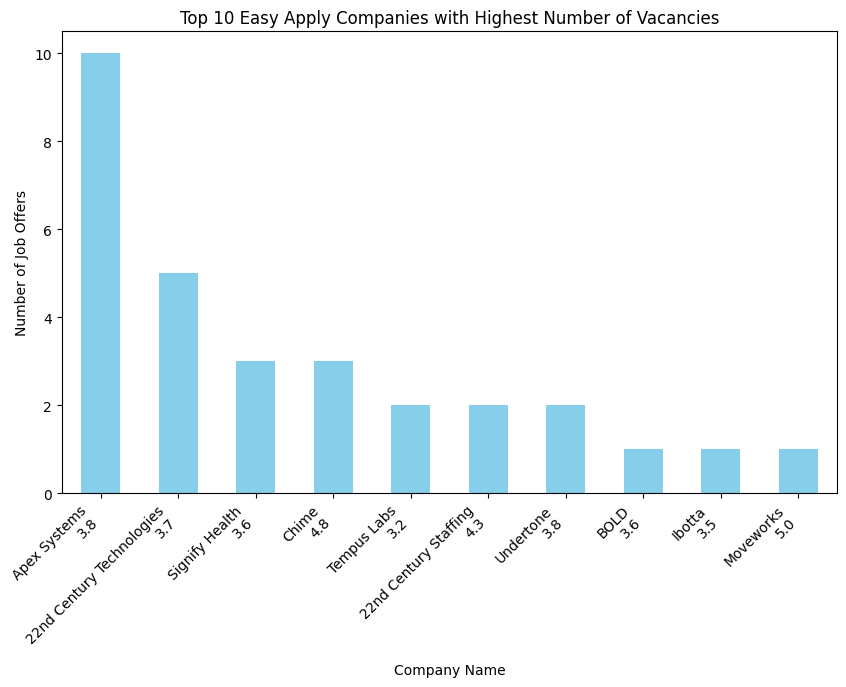

In [ ]:
easy_apply_companies = df[df['Easy Apply'] == 'True']

top_10_easy_apply = easy_apply_companies['Company Name'].value_counts().head(10)

#print(top_10_easy_apply)
plt.figure(figsize=(10, 6))
top_10_easy_apply.plot(kind='bar', color='skyblue')
plt.title('Top 10 Easy Apply Companies with Highest Number of Vacancies')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Offers')
plt.xticks(rotation=45, ha='right')
plt.show()


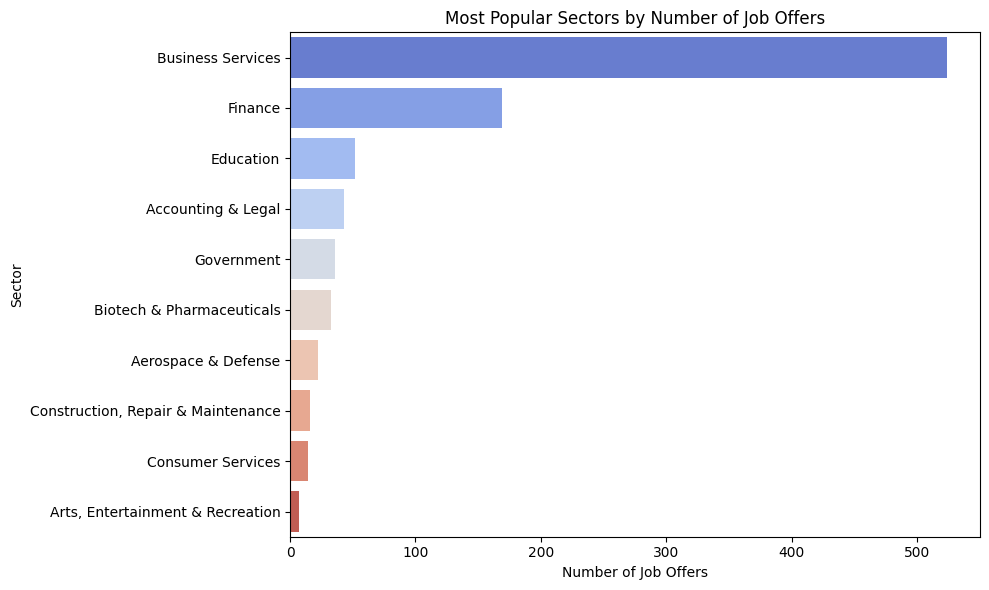

In [ ]:
df = df[~df['Sector'].isin([0, '-1', 'Unknown', ''])]

sector_job_offers = df.groupby('Sector').size().reset_index(name='Job Offer Count').head(10)

top_sectors = sector_job_offers.sort_values(by='Job Offer Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Job Offer Count', y='Sector', data=top_sectors, palette='coolwarm')
plt.title('Most Popular Sectors by Number of Job Offers')
plt.xlabel('Number of Job Offers')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

In [ ]:
df.head(15)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),0,True,37000.0,66000.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,0,37000.0,66000.0
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),0,0,37000.0,66000.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,66000.0
5,Data Analyst,$37K-$66K (Glassdoor est.),3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,0,0,37000.0,66000.0
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,0,0,37000.0,66000.0
7,Data Science Analyst,$37K-$66K (Glassdoor est.),3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,37000.0,66000.0
8,Data Analyst,$37K-$66K (Glassdoor est.),4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",0,37000.0,66000.0
9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",0,37000.0,66000.0


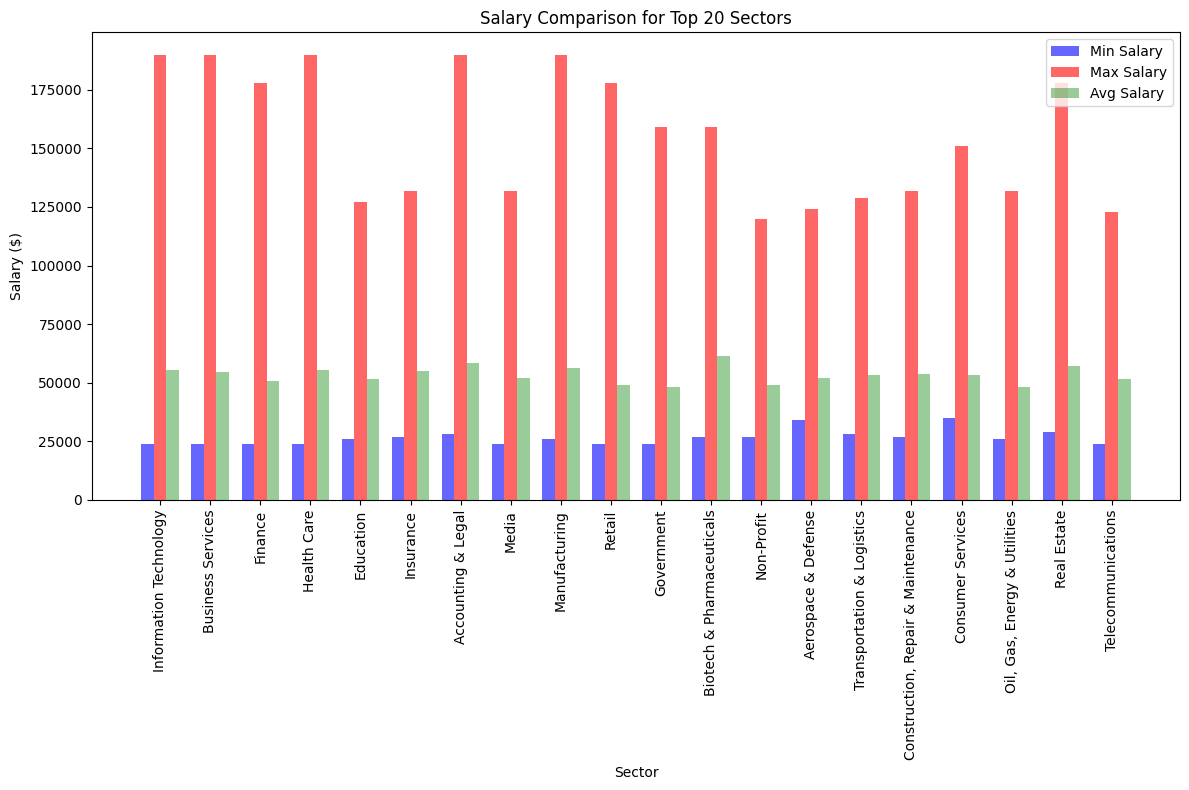

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Min,Salary Max
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),0,True,37000.0,66000.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,37000.0,66000.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,0,37000.0,66000.0
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),0,0,37000.0,66000.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37000.0,66000.0


In [ ]:
salary_comparison = df.groupby('Sector').agg(
    Min_Salary=('Salary Min', 'min'),
    Max_Salary=('Salary Max', 'max'),
    Avg_Salary=('Salary Min', 'mean'),
    Job_Count=('Job Title', 'count')
).reset_index()

top_20_sectors = salary_comparison.sort_values(by='Job_Count', ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 8))


bar_width = 0.25
x = range(len(top_20_sectors['Sector']))


plt.bar(x, top_20_sectors['Min_Salary'], width=bar_width, label='Min Salary', color='blue', alpha=0.6)
plt.bar([i + bar_width for i in x], top_20_sectors['Max_Salary'], width=bar_width, label='Max Salary', color='red', alpha=0.6)
plt.bar([i + 2 * bar_width for i in x], top_20_sectors['Avg_Salary'], width=bar_width, label='Avg Salary', color='green', alpha=0.4)

# Adding labels and title
plt.xlabel('Sector')
plt.ylabel('Salary ($)')
plt.title('Salary Comparison for Top 20 Sectors')
plt.xticks([i + bar_width for i in x], top_20_sectors['Sector'], rotation=90)
plt.legend()

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()
df.head()

Top 10 Job Titles by Number of Offers:
                 Job Title  Number of Offers
0             Data Analyst               333
1      Senior Data Analyst               113
2      Junior Data Analyst                57
3    Business Data Analyst                25
4     Data Quality Analyst                17
5      Middle Data Analyst                14
6        Lead Data Analyst                13
7  Data Governance Analyst                13
8   Data Reporting Analyst                12
9   Financial Data Analyst                 9


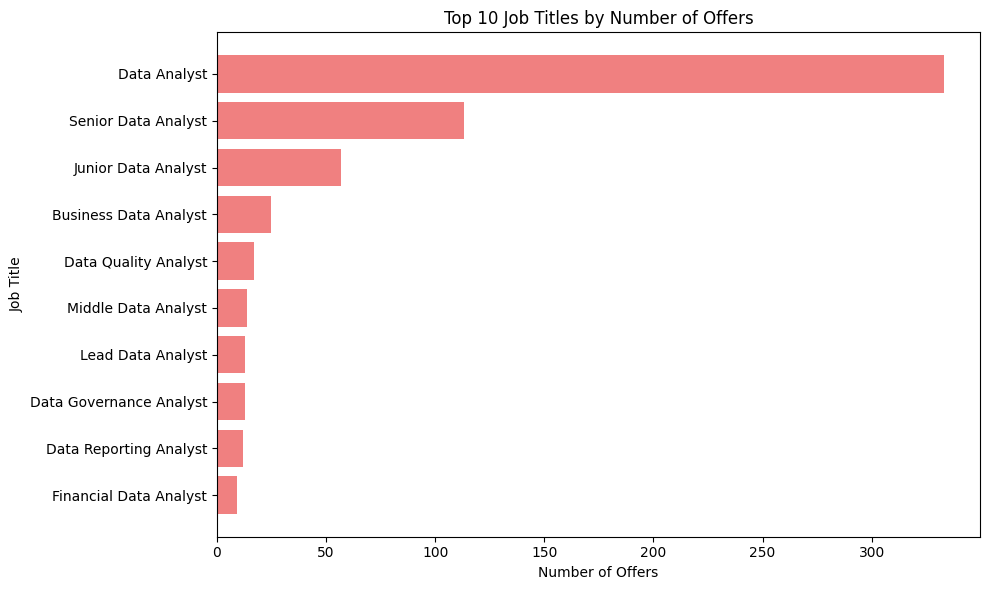

In [ ]:
top_10_job_titles = df['Job Title'].value_counts().nlargest(10).reset_index()
top_10_job_titles.columns = ['Job Title', 'Number of Offers']

print("Top 10 Job Titles by Number of Offers:")
print(top_10_job_titles)


plt.figure(figsize=(10, 6))
plt.barh(top_10_job_titles['Job Title'], top_10_job_titles['Number of Offers'], color='lightcoral')
plt.xlabel('Number of Offers')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles by Number of Offers')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



Top 10 Job Titles by Their Average Salary:
                                     Job Title  Avg_Salary
9    19-0574 - Service Operations Data Analyst    113000.0
47              Analyst, Financial Master Data    113000.0
184                     Copyright Data Analyst    113000.0
231                   Data Analyst *Temp-Hire*    113000.0
256              Data Analyst - Health, Senior    113000.0
271         Data Analyst - Marketing Analytics    113000.0
398                  Data Analyst-HEDIS & Star    113000.0
448   Data Entry Clerk and Analyst - Financial    113000.0
566                     Discovery Data Analyst    113000.0
673                   LIMS Master Data Analyst    113000.0


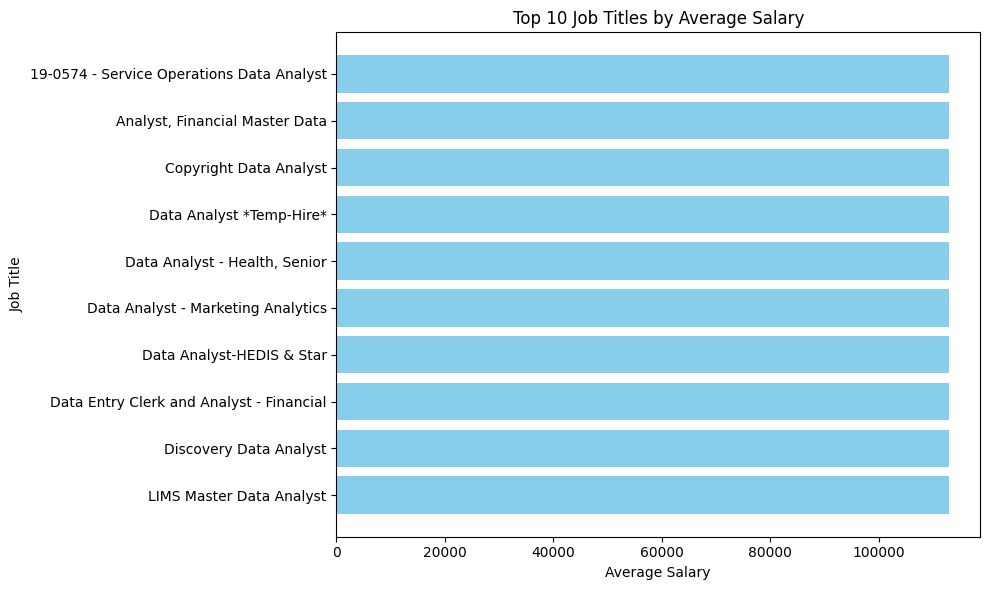

In [ ]:
top_10_avg_salary_job_titles = df.groupby('Job Title').agg(
    Avg_Salary=('Salary Min', 'mean')
).reset_index()

top_10_avg_salary_job_titles = top_10_avg_salary_job_titles.nlargest(10, 'Avg_Salary')

print("Top 10 Job Titles by Their Average Salary:")
print(top_10_avg_salary_job_titles)

plt.figure(figsize=(10, 6))
plt.barh(top_10_avg_salary_job_titles['Job Title'], top_10_avg_salary_job_titles['Avg_Salary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles by Average Salary')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


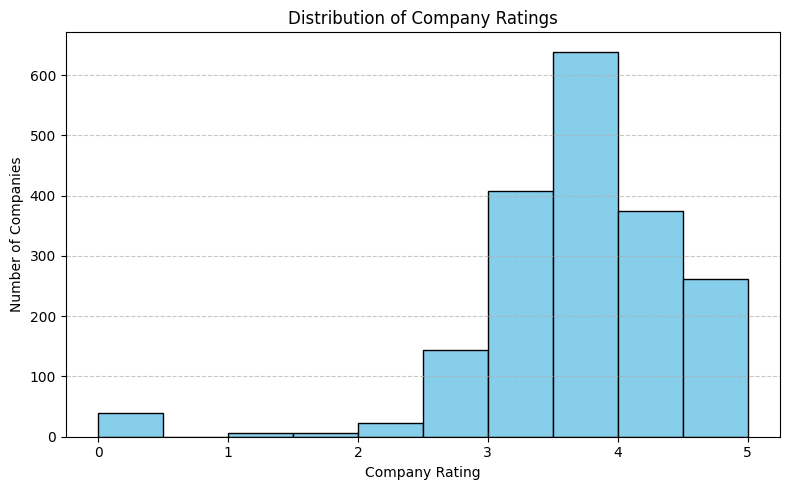

In [ ]:
df = df.dropna(subset=['Rating'])

plt.figure(figsize=(8, 5))
plt.hist(df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Company Rating')
plt.ylabel('Number of Companies')
plt.title('Distribution of Company Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
